## **Descriptive Analysis**

## **Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.**

In [1]:
import pandas as pd
from google.colab import files
import os

# Upload the csv file
uploaded = files.upload()

# Get the correct filename
filename = list(uploaded.keys())[0]   # Automaticallt get the uploaded file's name

# Read the CSV file
df = pd.read_csv(filename)

# check if the dataset is loaded correctly
print(df.head())

Saving Dataset .csv to Dataset .csv
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ort

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
# select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_columns)

Numerical columns: Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


In [7]:
# select numerical columns
numerical_columns = ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

# compute statistical measures
stats = df[numerical_columns].describe().T

# Print the results
print(stats[['mean', '50%', 'std', 'min', 'max']]. rename(columns={'50%' : 'median'}))


                             mean      median           std         min  \
Longitude               64.126574   77.191964     41.467058 -157.948486   
Latitude                25.854381   28.570469     11.007935  -41.330428   
Average Cost for two  1199.210763  400.000000  16121.183073    0.000000   
Price range              1.804837    2.000000      0.905609    1.000000   
Aggregate rating         2.666370    3.200000      1.516378    0.000000   
Votes                  156.909748   31.000000    430.169145    0.000000   

                                max  
Longitude                174.832089  
Latitude                  55.976980  
Average Cost for two  800000.000000  
Price range                4.000000  
Aggregate rating           4.900000  
Votes                  10934.000000  


## **Explore the distribution of categorical variables like "Country Code","City", and "Cuisines".**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import pandas as pd
from google.colab import files
import os

# Upload the csv file
uploaded = files.upload()

# Get the correct filename
filename = list(uploaded.keys())[0]   # Automaticallt get the uploaded file's name

# Read the CSV file
df = pd.read_csv(filename)

# check if the dataset is loaded correctly
print(df.head())

Saving Dataset .csv to Dataset  (2).csv
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La,

In [14]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values in the 'Country Code','City',or 'Cuisines' Columns
df= df.dropna(subset=['Country Code', 'City', 'Cuisines'])

# Drop any duplicate rows
df = df.drop_duplicates()

# check the data again to ensure it is clean
print(df.head())


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Manda

**Distribution of Country Code**

Country Code
1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64


<ipython-input-15-2fe8c56aec67>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


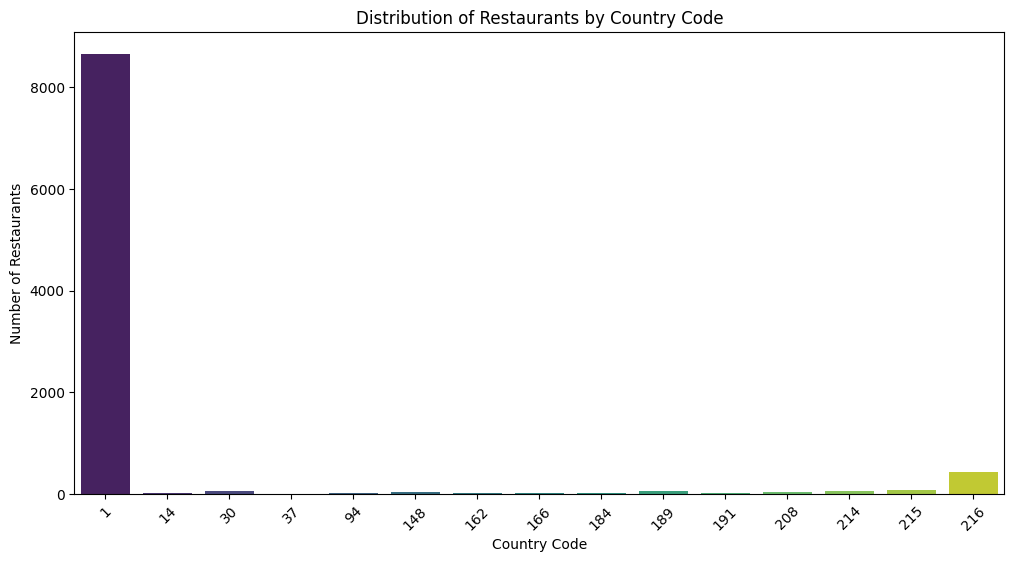

In [15]:
# Count the number of restaurrants by 'Country Code'
country_counts = df['Country Code'].value_counts()

# Display the distribution of country codes
print(country_counts)

# Plot the distribution of restaurants by 'Country Code'
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country Code')
plt.xticks(rotation=45)
plt.show()

**Distribution of City**

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64


<ipython-input-16-cb65abab1a74>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette='Set1')


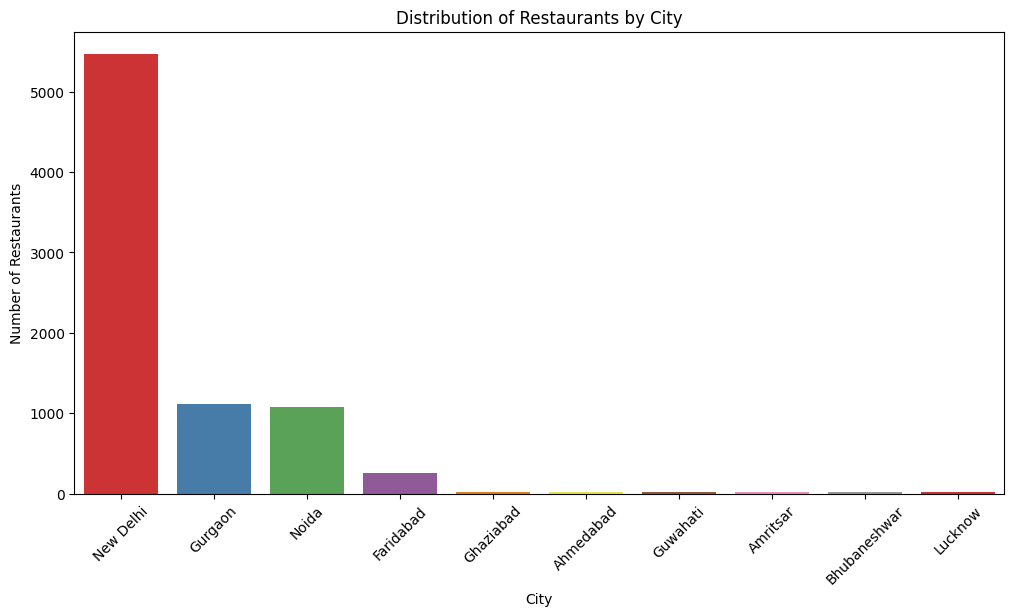

In [16]:
# Count the number of restaurants by 'City'
city_counts = df['City'].value_counts()

# Display the distribution of cities
print(city_counts.head(10))  # Display the top 10 cities

#plot the distribution of restaurants by 'City'
plt.figure(figsize=(12,6))
sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette='Set1')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by City')
plt.xticks(rotation=45)
plt.show()

**Distribution of Cuisine**

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64


<ipython-input-17-ba9f4da7e0da>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='Set3')


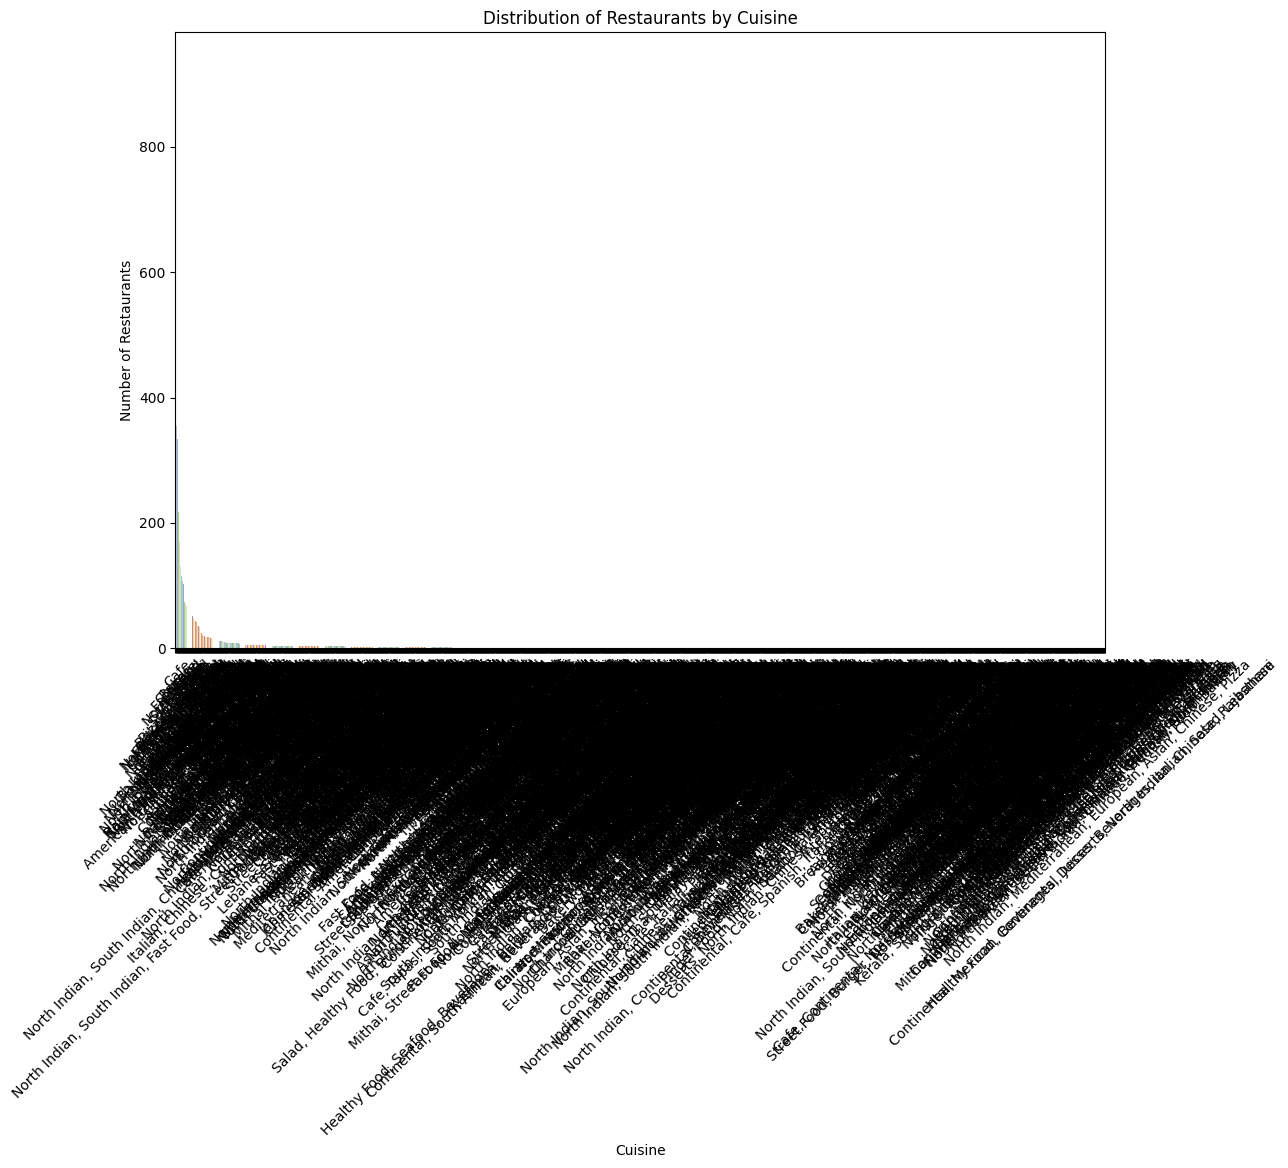

In [17]:
# Count the number of restaurants by 'Cuisine'
cuisine_counts = df['Cuisines'].value_counts()

# Display the distribution of cuisines
print(cuisine_counts)

# Plot the distribution of restaurants by 'Cusine'
plt.figure(figsize=(12,8))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='Set3')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Cuisine')
plt.xticks(rotation=45)
plt.show()

**Identify the top cuisines and cities with the highest number of restaurants.**

In [18]:
import pandas as pd
from google.colab import files
import os

# Upload the csv file
uploaded = files.upload()

# Get the correct filename
filename = list(uploaded.keys())[0]   # Automaticallt get the uploaded file's name

# Read the CSV file
df = pd.read_csv(filename)

# check if the dataset is loaded correctly
print(df.head())

Saving Dataset .csv to Dataset  (3).csv
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La,

In [19]:
# Check for missing values and duplicates
df.isnull().sum()   # Check for missing Values
df = df.dropna()    # Drop rows with missing Values (if necessary)
df = df.drop_duplicates() # Drop duplicates rows

In [22]:
# Group by Cuisine and City to count restaurants
cuisine_counts = df.groupby('Cuisines') ['Restaurant ID'].count().reset_index()
city_counts = df.groupby('City') ['Restaurant ID'].count().reset_index()

# Sort the data to identify top cuisines and cities
top_cuisines = cuisine_counts.sort_values(by='Restaurant ID', ascending=False).head(10)
top_cities = city_counts.sort_values(by='Restaurant ID', ascending=False).head(10)

In [23]:
# Display the results
print("Top 10 Cuisines with the Highest Number of Restaurants :")
print(top_cuisines)

print("\nTop 10 cities with the Highest Number of Restaurants :")
print(top_cities)

Top 10 Cuisines with the Highest Number of Restaurants :
                            Cuisines  Restaurant ID
1306                    North Indian            936
1329           North Indian, Chinese            511
497                          Chinese            354
828                        Fast Food            354
1514           North Indian, Mughlai            334
331                             Cafe            299
177                           Bakery            218
1520  North Indian, Mughlai, Chinese            197
186                 Bakery, Desserts            170
1749                     Street Food            149

Top 10 cities with the Highest Number of Restaurants :
            City  Restaurant ID
87     New Delhi           5473
50       Gurgaon           1118
88         Noida           1080
43     Faridabad            251
48     Ghaziabad             25
2      Ahmedabad             21
5       Amritsar             21
51      Guwahati             21
69       Lucknow           

# **Akankshya Sharma**